In [5]:
# Download the data set

data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
!wget $data

--2024-10-07 01:23:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.05s   

2024-10-07 01:23:33 (5.43 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



In [6]:
import pandas as pd
import numpy as np 

In [7]:
# Read the CSV into a Pandas dataframe
df = pd.read_csv('laptops.csv')
total_rows = len(df)

In [10]:
# Normalize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


Next, use only the following columns:

'ram',
'storage',
'screen',
'final_price'

In [15]:
df = df[['ram', 'storage', 'screen', 'final_price']]

Question 1

There's one column with missing values. What is it?

In [20]:
df.isnull().sum()

# The 'final_price' column has 4 empty values

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Question 2

What's the median (50% percentile) for variable 'ram'?

In [27]:
# Use the median() method directly on the column
df['ram'].median()

# Answer: Median = 16.0


16.0

Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [36]:
# Create indexes and shuffle the dataset using seed 42
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# Split data into train/val/test sets with 60%/20%/20% distribution
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

,ram,storage,screen,final_price
1925,32,1000,15.6,4805.65
612,16,512,13.0,2189.00
443,16,512,15.6,1349.00
1002,16,512,15.0,2175.83
1077,16,1000,15.6,1248.59
...,...,...,...,...
1638,8,512,15.0,1838.29
1095,8,256,15.6,531.80
1130,8,256,13.3,765.33
1294,8,512,14.0,803.61


Question 3

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [57]:
# Create function to prepare X while filling the NA values with zero
def prepare_X_fill_with_zero(df):
    X = df.fillna(0).values
    return X

# Call the function to generate X_train and X_val
X_train = prepare_X_fill_with_zero(df_train)
X_val = prepare_X_fill_with_zero(df_val)
print(f"X_train value is {X_train}")
print(f"X_val value is {X_val}")



X_train value is [[  32.   1000.     15.6  1123.29]
 [   4.     64.     14.1   201.05]
 [  32.   1000.     14.    997.74]
 ...
 [  16.    512.     15.6  1059.  ]
 [  16.    512.     14.   1671.  ]
 [  16.    512.     14.   1056.  ]]
X_val value is [[  32.   1000.     16.   2599.  ]
 [  16.    512.     15.6   999.  ]
 [  12.    512.     15.6   477.28]
 ...
 [   8.    512.     14.    565.54]
 [  16.    512.     14.    738.  ]
 [   4.     64.     14.    452.  ]]


In [58]:
y_train = np.log1p(df_train.final_price.values)

In [59]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [71]:
w0, w = train_linear_regression(X_train,y_train)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='final_price', ylabel='Count'>

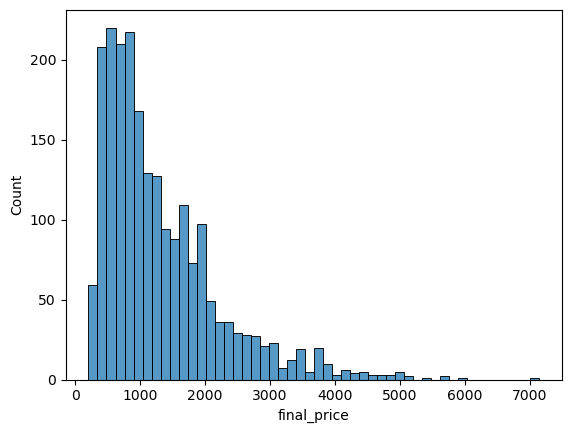

In [65]:
sns.histplot(df.final_price, bins=50)

<Axes: xlabel='final_price', ylabel='Count'>

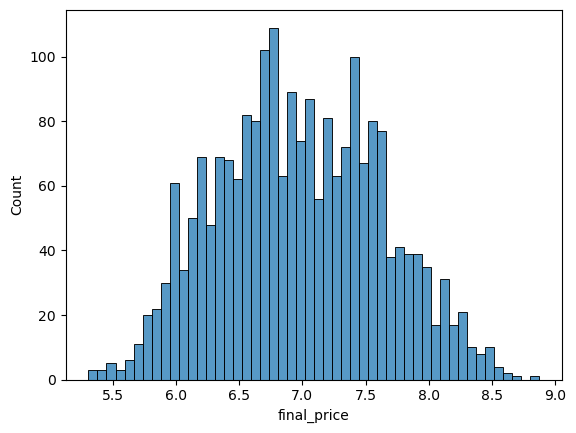

In [66]:
price_logs = np.log1p(df.final_price)
sns.histplot(price_logs, bins=50)

In [67]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [72]:
y_pred = w0 + X_train.dot(w)
y_pred

array([6.87509951, 6.23650687, 6.81884509, ..., 6.79330692, 7.1984727 ,
       6.81372126])

<Axes: ylabel='Count'>

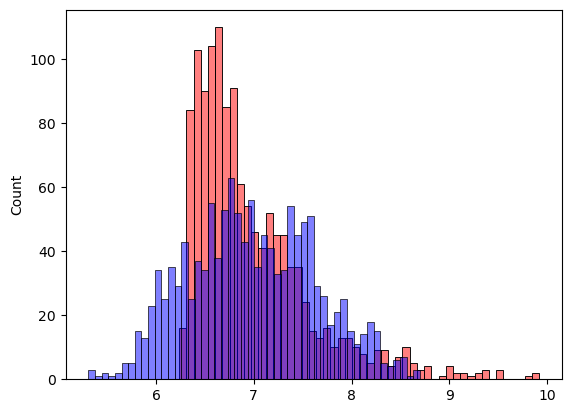

In [73]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5,  bins=50)

In [74]:
# Function to compute RMSE

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [76]:
rmse_fill_with_zero = round(rmse(y_train, y_pred),2)
rmse_fill_with_zero

0.24

Now compute the RMSE using by filling the N/A values with the mean

In [84]:
# Create function to prepare X while filling the NA values with zero
def prepare_X_fill_with_mean(df):
    mean_value = df.mean()
    X = df.fillna(0).values
    return X

In [85]:
# Call the function to generate X_train and X_val
X_train = prepare_X_fill_with_mean(df_train)
X_val = prepare_X_fill_with_mean(df_val)
print(f"X_train value is {X_train}")
print(f"X_val value is {X_val}")

X_train value is [[  32.   1000.     15.6  1123.29]
 [   4.     64.     14.1   201.05]
 [  32.   1000.     14.    997.74]
 ...
 [  16.    512.     15.6  1059.  ]
 [  16.    512.     14.   1671.  ]
 [  16.    512.     14.   1056.  ]]
X_val value is [[  32.   1000.     16.   2599.  ]
 [  16.    512.     15.6   999.  ]
 [  12.    512.     15.6   477.28]
 ...
 [   8.    512.     14.    565.54]
 [  16.    512.     14.    738.  ]
 [   4.     64.     14.    452.  ]]


In [87]:
# Establish y_train values
y_train = np.log1p(df_train.final_price.values)

# Train the linear regression
w0, w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)
y_pred

array([6.87509951, 6.23650687, 6.81884509, ..., 6.79330692, 7.1984727 ,
       6.81372126])

<Axes: ylabel='Count'>

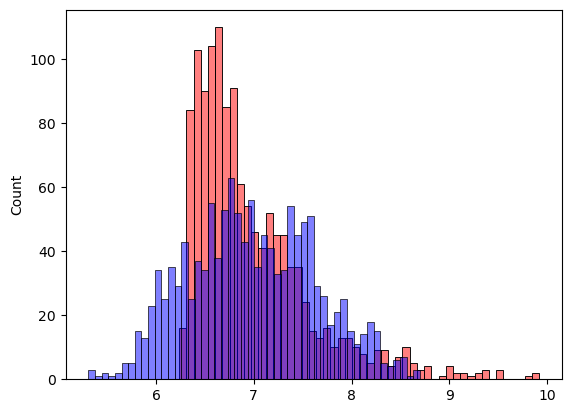

In [88]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5,  bins=50)

In [89]:
rmse_fill_with_mean = round(rmse(y_train, y_pred),2)
rmse_fill_with_mean

0.24

Whether I filled the N/A values with zero or with the mean, the RMSE was the same in both cases. RMSE = 0.24.